In [0]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import pickle
import cv2
import json
import os
import glob
import numpy as np

## **Draw Pitch**

http://petermckeever.com/2019/01/plotting-pitches-in-python/ <br/>
https://fcpython.com/visualisation/drawing-pitchmap-adding-lines-circles-matplotlib

580.32 369.64799999999997 72.0


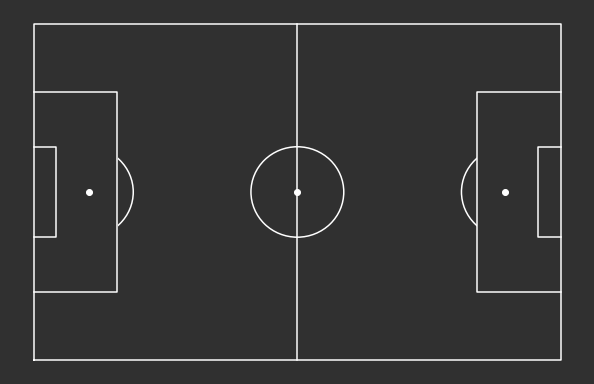

In [273]:
lines_color = 'white'
pitch_color = '#303030'

fig, ax = plt.subplots(figsize=(10.4,6.8))
fig.set_facecolor('#303030')
ax.axis('off')

## Touch Line 104m (X axis)
## Goal line 68m (Y axis)
ly1 = [0,0,68,68,0]
lx1 = [0,104,104,0,0]
plt.plot(lx1,ly1,color=lines_color,zorder=5)

## Penalty Area 1
# 40.32m -- (68 - 40.32) / 2 = 13.84m -- (40.32 + 13.84) = 52.16m (Y axis)  
# 16.5m -- (104 - 16.5) = 87.5m (X axis)
ly2 = [13.84,13.84,54.16,54.16] 
lx2 = [104,87.5,87.5,104]
plt.plot(lx2,ly2,color=lines_color,zorder=5)

## Penalty Area 2
# 40.32m -- (68 - 40.32) / 2 = 13.84m -- (40.32 + 13.84) = 52.16m (Y axis)  
# 16.5m -- (X axis)
ly3 = [13.84,13.84,54.16,54.16] 
lx3 = [0,16.5,16.5,0]
plt.plot(lx3,ly3,color=lines_color,zorder=5)

## Goal Area 1 
## Unnecessary
ly6 = [24.84,24.84,43.16,43.16]
lx6 = [104,99.5,99.5,104]
plt.plot(lx6,ly6,color=lines_color,zorder=5)

## Goal Area 2
## Unnecessary
ly7 = [24.84,24.84,43.16,43.16]
lx7 = [0,4.5,4.5,0]
plt.plot(lx7,ly7,color=lines_color,zorder=5)

## Halfway Line
## 104 / 2 = 52m (X axis)
## 68m (Y axis)
vcy5 = [0,68] 
vcx5 = [52,52]
plt.plot(vcx5,vcy5,color=lines_color,zorder=5)

## Dots (CenterMark and Penalties)
plt.scatter(93,34,color=lines_color,zorder=5)
plt.scatter(11,34,color=lines_color,zorder=5)
plt.scatter(52,34,color=lines_color,zorder=5)

## Circles (CenterMark and Penalties) -- Adding rectangles to hide penalty circles
circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=1.5,color=lines_color, fill=False, zorder=1,alpha=1)
circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=1.5,color=lines_color, fill=False, zorder=1,alpha=1)
circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=1.5,color=lines_color, fill=False, zorder=2,alpha=1)

rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color=pitch_color, zorder=1,alpha=1)
rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color=pitch_color, zorder=1,alpha=1)
rec3 = plt.Rectangle((-1,-1), 106,70,color=pitch_color,zorder=1,alpha=1)

ax.add_artist(rec3)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(rec1)
ax.add_artist(rec2)
ax.add_artist(circle3)


# plt.show()

# Save figure with some whitespace around
plt.savefig('/home/alex/Downloads/pitch.png', bbox_inches = 'tight')

## Save figure without whitespace around
# plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
# plt.margins(0.009,0.009)
# plt.savefig('/home/alex/Downloads/pitch_nospace.png', transparent=True)

(384, 594, 4)


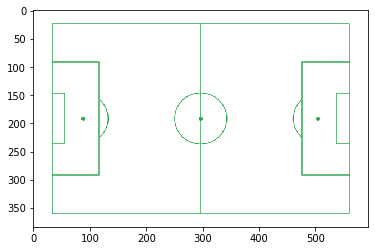

In [0]:
img = mpimg.imread('/home/alex/Downloads/pitch.png')
print(img.shape)
imgplot = plt.imshow(img)
plt.show()


## **Converting broadcast 3D game to a 2D map**

### Example #1

In [0]:
## https://docs.opencv.org/master/d9/dab/tutorial_homography.html

def draw_points(image, player=False):
    ''' Get N points (x, y) from image '''

    def mouse_handler(event, x_pos, y_pos, _, data):
        ''' Draw points over image '''

        if event == cv2.EVENT_LBUTTONDOWN:
            cv2.circle(data['im'], (x_pos, y_pos), 3, (0, 0, 255), 5, 16)
            cv2.imshow('Image', data['im'])
            if player:
                data['points'].append([x_pos, y_pos, 1])
            else:
                data['points'].append([x_pos, y_pos])
        elif event == cv2.EVENT_RBUTTONDOWN:
            data['valid'] = False

    data = {}
    data['im'] = image.copy()
    data['points'] = []
    data['valid'] = True

    cv2.imshow('Image', image)
    cv2.setMouseCallback('Image', mouse_handler, data)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    if not data['valid']:
        return None

    points = np.vstack(data['points']).astype(float)
    return points

In [0]:
'''
For each of the first two images, draw N dots.
Make sure you do them on the right order and the same number of dots.

For the third image, draw a dot on each player.
Make sure you're using the player's position feet, and not just the middle/average.
'''

im_src = cv2.imread('/mnt/Shared/LigaMX/Images/TolucaVSPumas/0-15/tolpum_0-15_015.jpg')
pts_src = draw_points(im_src)

im_dst = cv2.imread('/home/alex/Downloads/pitch.png')
pts_dst = draw_points(im_dst)

h_matrix, _ = cv2.findHomography(pts_src, pts_dst)
im_temp = cv2.warpPerspective(im_src, h_matrix, (im_dst.shape[1], im_dst.shape[0]))

cv2.fillConvexPoly(im_dst, pts_dst.astype(int), 0, 16)
im_dst = im_dst + im_temp

all_p_pos_src = draw_points(im_src, True)
for i in all_p_pos_src:
    p_pos_src = np.array(i)
    p_pos_src = p_pos_src.reshape(3, 1)
    p_pos_dst = np.dot(h_matrix, p_pos_src)
    p_pos_dst = p_pos_dst/p_pos_dst[2]
    print('Player position: ({}, {})'.format(p_pos_dst[0], p_pos_dst[1]))
    cv2.circle(im_dst, (p_pos_dst[0], p_pos_dst[1]), 5, (243, 27, 88), 2)

cv2.imshow("Image", im_dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Example #2

In [0]:
im_src = cv2.imread('/home/alex/Downloads/tolpum_0-15_015.jpg')
pts_src = np.array([[56.0, 603.0], [525.0, 448.0], [865.0, 331.0], [1076.0, 261.0],
                    [29.0, 410.0], [538.0, 285.0], [381.0, 263.0], [607.0, 216.0]])

im_dst = cv2.imread('/home/alex/Downloads/pitch.png')
pts_dst = np.array([[118.0, 293.0], [117.0, 226.0], [118.0, 160.0], [116.0, 93.0],
                    [57.0, 236.0], [56.0, 149.0], [35.0, 148.0], [36.0, 94.0]])

h_matrix, _ = cv2.findHomography(pts_src, pts_dst)

players_positions_src = [[411.0, 711.0, 1], [564.0, 507.0, 1], [1010.0, 671.0, 1], [1039.0, 492.0, 1], 
                         [1321.0, 914.0, 1], [1519.0, 673.0, 1], [1471.0, 516.0, 1], [1280.0, 272.0, 1]]

for i in players_positions_src:
    p_pos_src = np.array(i)
    p_pos_src = p_pos_src.reshape(3, 1)
    p_pos_dst = np.dot(h_matrix, p_pos_src)
    p_pos_dst = p_pos_dst / p_pos_dst[2]
    print('Player position: ({}, {})'.format(p_pos_dst[0], p_pos_dst[1]))
    cv2.circle(im_dst, (p_pos_dst[0], p_pos_dst[1]), 8, (243, 27, 88), -1)

cv2.imshow('Image', im_dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [0]:
im_src = cv2.imread('/home/alex/Downloads/pitch/105.jpg')

## Resizing image
scale_percent = 60
width = int(im_src.shape[1] * scale_percent / 100)
height = int(im_src.shape[0] * scale_percent / 100)
dim = (width, height)
im_src = cv2.resize(im_src, dim, interpolation = cv2.INTER_AREA)

pts_src = draw_points(im_src)

im_dst = cv2.imread('/home/alex/Downloads/pitch.png')
pts_dst = draw_points(im_dst)

h_matrix, _ = cv2.findHomography(pts_src, pts_dst)
im_temp = cv2.warpPerspective(im_src, h_matrix, (im_dst.shape[1], im_dst.shape[0]))
cv2.fillConvexPoly(im_dst, pts_dst.astype(int), 0, 16)
im_dst = im_dst + im_temp

players_positions_src = draw_points(im_src, True)

for i in players_positions_src:
    p_pos_src = np.array(i)
    p_pos_src = p_pos_src.reshape(3, 1)
    p_pos_dst = np.dot(h_matrix, p_pos_src)
    p_pos_dst = p_pos_dst / p_pos_dst[2]
    print('Player position: ({}, {})'.format(p_pos_dst[0], p_pos_dst[1]))
    cv2.circle(im_dst, (p_pos_dst[0], p_pos_dst[1]), 8, (243, 27, 88), -1)

cv2.imshow('Image', im_dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [0]:
## DOING THE INVERSE
## From 2D Map to Broadcast (Useful if you want to draw line of field since you know the exact coordinates of the map)
## Same procedure but use the inverse of h_matrix instead

## 115, 95

h_matrix_inverse = np.linalg.inv(h_matrix)
test_position = np.array([115, 95, 1])
test_position = test_position.reshape(3, 1)
test = np.dot(h_matrix_inverse, test_position)
test = test / test[2]

cv2.circle(im_src, (test[0], test[1]), 15, (243, 27, 88), -1)
cv2.imshow('Image', im_src)
cv2.waitKey(0)
cv2.destroyAllWindows()

# p_pos_src = np.array(i)
# p_pos_src = p_pos_src.reshape(3, 1)
# p_pos_dst = np.dot(h_matrix, p_pos_src)
# p_pos_dst = p_pos_dst / p_pos_dst[2]

# p_pos_dst[0] = 35
# p_pos_dst[1] = 25



In [0]:
im_src = cv2.imread('/mnt/Shared/LigaMX/Images/TolucaVSPumas/0-15/tolpum_0-15_108.jpg')

scale_percent = 60
width = int(im_src.shape[1] * scale_percent / 100)
height = int(im_src.shape[0] * scale_percent / 100)
dim = (width, height)
im_src = cv2.resize(im_src, dim, interpolation = cv2.INTER_AREA)

pts_src = draw_points(im_src)

im_dst = cv2.imread('/home/alex/Downloads/pitch.png')
pts_dst = draw_points(im_dst)

h_matrix, _ = cv2.findHomography(pts_src, pts_dst)

im_temp = cv2.warpPerspective(im_src, h_matrix, (im_dst.shape[1], im_dst.shape[0]))

cv2.fillConvexPoly(im_dst, pts_dst.astype(int), 0, 16)
im_dst = im_dst + im_temp

cv2.imshow("Image", im_dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Converting broadcast images to field-view only images

Excludes crowd and players to get a simple and general view of the field.

In [0]:
with open('/home/alex/Downloads/6_Players.json') as f:
    coco_json = json.load(f)

images = coco_json['images']
annotations = coco_json['annotations']

for image in images:
    
    image_filename = os.path.join('/mnt/Shared/LigaMX/Images/TolucaVSPumas/0-15', image['file_name'])
    print('Processing {}'.format(image_filename))
    image_bboxes = [i['bbox'] for i in annotations if i['image_id'] == image['id']]

    img = cv2.imread(image_filename)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

    sensitivity = 30
    light_green = (60 - sensitivity, 100, 50)
    dark_green = (60 + sensitivity, 255, 255)
    mask = cv2.inRange(img_hsv, light_green, dark_green)
    result = cv2.bitwise_and(img, img, mask=mask)
    blur = cv2.GaussianBlur(result, (7, 7), 0)

    ## Removing 'marcador'
    cv2.rectangle(blur, (150, 70), (625, 125), (0, 0, 0), -1)

    inpaint_mask = np.zeros(img.shape[:2], np.uint8)
    for image_bbox in image_bboxes:
        x1, y1, box_w, box_h = image_bbox
        cv2.rectangle(inpaint_mask, (int(x1), int(y1)), (int(x1 + box_w), int(y1 + box_h)), (255, 255, 255), -1)

    dst = cv2.inpaint(blur, inpaint_mask, 3, cv2.INPAINT_NS) 
    image_filename_out = os.path.join('/home/alex/Downloads/field', image['file_name'])
    cv2.imwrite(image_filename_out, dst)
    # break 

# cv2.imshow("Image", dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Creating Field-View Images/Homography Matrix Pairs

Each Field-View Image generated in the previous step has its own Homography Matrix.

In [0]:
with open('/home/alex/Downloads/6_Players.json') as f:
    coco_json = json.load(f)
images = coco_json['images']
annotations = coco_json['annotations']

field_view_images = os.listdir('/home/alex/Downloads/field')
field_view_images = [i for i in field_view_images if i.endswith('.jpg') and not i.endswith('map.jpg')]
for idx, f in enumerate(field_view_images):

    print('Processing image #{}/{} -- {}'.format(idx + 1, len(field_view_images), f))

    filename_in = os.path.join('/home/alex/Downloads/field', f)
    filename_out = os.path.join('/home/alex/Downloads/field', f.split('.')[0])

    if os.path.isfile('{}_map.jpg'.format(filename_out)):
        continue

    im_src = cv2.imread(filename_in)
    pts_src = draw_points(im_src)

    im_dst = cv2.imread('/home/alex/Downloads/pitch.png')
    pts_dst = draw_points(im_dst)

    h_matrix, _ = cv2.findHomography(pts_src, pts_dst)
    np.save('{}.npy'.format(filename_out), h_matrix)

    image_id = [i['id'] for i in images if i['file_name'] == f][0]
    image_bboxes = [i['bbox'] for i in annotations if i['image_id'] == image_id]

    for bbox in image_bboxes:
        x1, y1, box_w, box_h = bbox
        x_avg = int((x1 + x1 + box_w) / 2)
        y_avg = int(y1 + box_h) - 10
        p_pos_src = np.array([x_avg, y_avg, 1])
        p_pos_src = p_pos_src.reshape(3, 1)
        p_pos_dst = np.dot(h_matrix, p_pos_src)
        p_pos_dst = p_pos_dst / p_pos_dst[2]
        cv2.circle(im_dst, (p_pos_dst[0], p_pos_dst[1]), 8, (243, 27, 88), -1)

    cv2.imwrite('{}_map.jpg'.format(filename_out), im_dst)

    # break


In [0]:
## Drawing players positions on image

im_src = cv2.imread('/mnt/Shared/LigaMX/Images/TolucaVSPumas/15-30/tolpum_15-30_004.jpg')

## FROM JSON MANUALLY LABELED FILE
# image_id = [i['id'] for i in images if i['file_name'] == 'tolpum_0-15_090.jpg'][0]
# image_bboxes = [i['bbox'] for i in annotations if i['image_id'] == image_id]

# for bbox in image_bboxes:
#     x1, y1, box_w, box_h = bbox
#     x_avg = int((x1 + x1 + box_w) / 2)
#     y_avg = int(y1 + box_h) - 10
#     cv2.circle(im_src, (x_avg, y_avg), 8, (243, 27, 88), -1)

## FROM DETECTRON
x0, y0, x1, y1 = 173.93327, 328.2264, 259.87497, 466.987
x_avg = (x0 + x1) / 2
y_avg = y1 - 10
cv2.rectangle(im_src, (int(x0), int(y0)), (int(x1), int(y1)), (243, 27, 88), 4)
cv2.circle(im_src, (int(x_avg), int(y_avg)), 8, (243, 27, 88), -1)

cv2.imshow("Image", im_src)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [0]:
## Converting Brodcast Images to Field Maps using Detectron2 player detections

images = glob.glob('/home/alex/Downloads/sample/*[0-9].jpg')
for image in images:
    
    bboxes_file = image.split('.')[0] + '.npy'
    image_bboxes = np.load(bboxes_file)

    img = cv2.imread(image) ## BGR
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

    sensitivity = 30
    light_green = (60 - sensitivity, 100, 50)
    dark_green = (60 + sensitivity, 255, 255)
    mask = cv2.inRange(img_hsv, light_green, dark_green)
    result = cv2.bitwise_and(img, img, mask=mask)
    blur = cv2.GaussianBlur(result, (7, 7), 0)

    ## Removing 'marcador'
    cv2.rectangle(blur, (150, 70), (625, 125), (0, 0, 0), -1)

    inpaint_mask = np.zeros(img.shape[:2], np.uint8)
    for image_bbox in image_bboxes:
        x0, y0, x1, y1 = image_bbox
        cv2.rectangle(inpaint_mask, (int(x0), int(y0)), (int(x1), int(y1)), (255, 255, 255), -1)

    dst = cv2.inpaint(blur, inpaint_mask, 3, cv2.INPAINT_NS) 
    image_filename_out = image.split('.')[0] + '_field.jpg'
    cv2.imwrite(image_filename_out, dst)

In [0]:
with open('/home/alex/Downloads/tracks.pickle', 'rb') as f:
    tracks = pickle.load(f)

In [0]:
input_video_filename = '/home/alex/Downloads/TolucaVSPumas_sample.mp4'
input_video = cv2.VideoCapture(input_video_filename)

h_matrix = np.array([])
bbox_colors = [(235, 64, 52), (235, 208, 52), (52, 235, 98)]

i = 0
while(input_video.isOpened()):
    ret, frame = input_video.read()
    if ret == True:

        if os.path.isfile('/home/alex/Downloads/pitch/matrix/{}_h_matrix.npy'.format(i)):
            print('Skipping', i)
            i += 1
            continue

        if i < 8:
            i += 1
            continue

        pitch = cv2.imread('/home/alex/Downloads/pitch.png')
    
        if i % 3 == 0 or h_matrix.size == 0:
            pts_src = draw_points(frame)

        if i % 20 == 0 or h_matrix.size == 0:
            pts_dst = draw_points(pitch)
        
        h_matrix, _ = cv2.findHomography(pts_src, pts_dst)
        im_temp = cv2.warpPerspective(frame, h_matrix, (pitch.shape[1], pitch.shape[0]))
        cv2.fillConvexPoly(pitch, pts_dst.astype(int), 0, 16)
        pitch = pitch + im_temp
        np.save('/home/alex/Downloads/pitch/matrix/{}_h_matrix'.format(i), h_matrix)

        for track in tracks:
            for bbox in track['bbox']:
                if bbox[0] == i:
                    x0, y0, x1, y1 = bbox[-1]
                    x_avg = (x0 + x1) / 2
                    y_avg = y1 - 10

                    p_pos_src = np.array([x_avg, y_avg, 1])
                    p_pos_src = p_pos_src.reshape(3, 1)
                    p_pos_dst = np.dot(h_matrix, p_pos_src)
                    p_pos_dst = p_pos_dst / p_pos_dst[2]

                    bbox_color = bbox_colors[bbox[2]]

                    cv2.putText(pitch, str(track['id']), (p_pos_dst[0], p_pos_dst[1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
                    cv2.circle(pitch, (p_pos_dst[0], p_pos_dst[1]), 8, bbox_color, -1)

                    cv2.putText(frame, str(track['id']), (int(x_avg), int(y_avg)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
                    cv2.circle(frame, (int(x_avg), int(y_avg)), 8, bbox_color, -1)

        cv2.imshow("Image", pitch)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        cv2.imwrite('/home/alex/Downloads/pitch/map/{}.jpg'.format(i), pitch)
        cv2.imwrite('/home/alex/Downloads/pitch/original/{}.jpg'.format(i), frame)

        i += 1

    else:
        break

input_video.release()

In [0]:
input_video_filename = '/home/alex/Downloads/TolucaVSPumas_sample.mp4'
input_video = cv2.VideoCapture(input_video_filename)

bbox_colors = [(235, 64, 52), (235, 208, 52), (52, 235, 98)]

i = 0
pts_dsts = []
while(input_video.isOpened()):
    ret, frame = input_video.read()
    if ret == True:

        if i < 8:
            i += 1
            continue

        pitch = cv2.imread('/home/alex/Downloads/pitch.png')
    
        if i in [1020, 1080]:

            pts_src = draw_points(frame)
            pts_dst = draw_points(pitch)
            h_matrix, _ = cv2.findHomography(pts_src, pts_dst)
            im_temp = cv2.warpPerspective(frame, h_matrix, (pitch.shape[1], pitch.shape[0]))
            cv2.fillConvexPoly(pitch, pts_dst.astype(int), 0, 16)
            pitch = pitch + im_temp

            for track in tracks:
                for bbox in track['bbox']:
                    if bbox[0] == i:
                        x0, y0, x1, y1 = bbox[-1]
                        x_avg = (x0 + x1) / 2
                        y_avg = y1 - 10

                        p_pos_src = np.array([x_avg, y_avg, 1])
                        p_pos_src = p_pos_src.reshape(3, 1)
                        p_pos_dst = np.dot(h_matrix, p_pos_src)
                        p_pos_dst = p_pos_dst / p_pos_dst[2]

                        bbox_color = bbox_colors[bbox[2]]

                        cv2.circle(pitch, (p_pos_dst[0], p_pos_dst[1]), 8, bbox_color, -1)

            cv2.imshow("Image", pitch)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

            pts_dsts.append([i, pts_dst])

        i += 1

    else:
        break

input_video.release()

In [0]:
input_video_filename = '/home/alex/Downloads/TolucaVSPumas_sample.mp4'
input_video = cv2.VideoCapture(input_video_filename)

bbox_colors = [(235, 64, 52), (235, 208, 52), (52, 235, 98)]

i = 0
while(input_video.isOpened()):
    ret, frame = input_video.read()
    if ret == True:

        if i < 8:
            i += 1
            continue

        pitch = cv2.imread('/home/alex/Downloads/pitch.png')
        h_matrix_filename = '/home/alex/Downloads/pitch/matrix/{}_h_matrix.npy'.format(i)
        h_matrix = np.load(h_matrix_filename)
        for track in tracks:
            for bbox in track['bbox']:
                if bbox[0] == i:
                    x0, y0, x1, y1 = bbox[-1]
                    x_avg = (x0 + x1) / 2
                    y_avg = y1 - 10

                    p_pos_src = np.array([x_avg, y_avg, 1])
                    p_pos_src = p_pos_src.reshape(3, 1)
                    p_pos_dst = np.dot(h_matrix, p_pos_src)
                    p_pos_dst = p_pos_dst / p_pos_dst[2]

                    bbox_color = bbox_colors[bbox[2]]

                    cv2.circle(pitch, (p_pos_dst[0], p_pos_dst[1]), 8, bbox_color, -1)

        cv2.imwrite('/home/alex/Downloads/pitch/result/{}.jpg'.format(i), pitch)


        i += 1

    else:
        break

input_video.release()


Converting Original Tracks to Map Tracks

In [0]:
map_tracks = []
for track in tracks:
    track_id = track['id']
    track_bboxes = track['bbox']
    map_bboxes = []
    for track_bbox in track_bboxes:
        frame = track_bbox[0]
        score = track_bbox[1]
        class_id = track_bbox[2]
        bbox = track_bbox[3]

        h_matrix_filename = '/home/alex/Downloads/pitch/matrix/{}_h_matrix.npy'.format(frame)
        h_matrix = np.load(h_matrix_filename)
        x0, y0, x1, y1 = bbox
        x_avg = (x0 + x1) / 2
        y_avg = y1 - 10
        p_pos_src = np.array([x_avg, y_avg, 1])
        p_pos_src = p_pos_src.reshape(3, 1)
        p_pos_dst = np.dot(h_matrix, p_pos_src)
        p_pos_dst = p_pos_dst / p_pos_dst[2]
        x_y_pos = [p_pos_dst[0], p_pos_dst[1]]

        map_bboxes.append([frame, score, class_id, x_y_pos])

    map_tracks.append({
        'id': track_id,
        'bbox': map_bboxes
    })

with open('/home/alex/Downloads/map_tracks.pickle', 'wb') as fp:
    pickle.dump(map_tracks, fp)